In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/Bankruptcy.csv')
df.head()

,FYEAR,Bankruptcy Status,CUSTOMERID,Ratio1,Ratio2,Ratio3,Ratio3.1,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9
0,1999,0,36020,0.307139,0.887006,1.647681,-0.199158,1.092964,-0.313289,-0.196793,1.206763,0.282471,0.158896
1,1999,0,36110,0.760736,0.592493,0.453003,-0.369890,0.186154,0.039619,0.327497,0.428418,1.106965,0.793443
2,1999,0,37520,-0.513596,0.337615,0.299015,-0.029080,-0.432605,0.829993,-0.707786,0.476153,2.179175,2.484584
3,1994,1,78110,-0.466129,0.370747,0.496067,-0.373429,-0.267424,0.977799,-0.610975,0.456810,0.151951,0.047789
4,1999,0,00079X10,2.023422,0.214876,0.182595,6.695360,-1.148338,-1.505889,2.876477,0.287375,-0.986442,0.791077


In [ ]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 2675 rows.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FYEAR              2675 non-null   int64  
 1   Bankruptcy Status  2675 non-null   int64  
 2   CUSTOMERID         2675 non-null   object 
 3   Ratio1             2675 non-null   float64
 4   Ratio2             2675 non-null   float64
 5   Ratio3             2675 non-null   float64
 6   Ratio3.1           2675 non-null   float64
 7   Ratio4             2675 non-null   float64
 8   Ratio5             2675 non-null   float64
 9   Ratio6             2675 non-null   float64
 10  Ratio7             2675 non-null   float64
 11  Ratio8             2675 non-null   float64
 12  Ratio9             2675 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 271.8+ KB


In [ ]:
df.dtypes

FYEAR                  int64
Bankruptcy Status      int64
CUSTOMERID            object
Ratio1               float64
Ratio2               float64
Ratio3               float64
Ratio3.1             float64
Ratio4               float64
Ratio5               float64
Ratio6               float64
Ratio7               float64
Ratio8               float64
Ratio9               float64
dtype: object

In [ ]:
df.isnull().any()

FYEAR                False
Bankruptcy Status    False
CUSTOMERID           False
Ratio1               False
Ratio2               False
Ratio3               False
Ratio3.1             False
Ratio4               False
Ratio5               False
Ratio6               False
Ratio7               False
Ratio8               False
Ratio9               False
dtype: bool

In [ ]:
df.isna().any()

FYEAR                False
Bankruptcy Status    False
CUSTOMERID           False
Ratio1               False
Ratio2               False
Ratio3               False
Ratio3.1             False
Ratio4               False
Ratio5               False
Ratio6               False
Ratio7               False
Ratio8               False
Ratio9               False
dtype: bool

In [ ]:
df['Bankruptcy Status'].value_counts()

0    2262
1     413
Name: Bankruptcy Status, dtype: int64

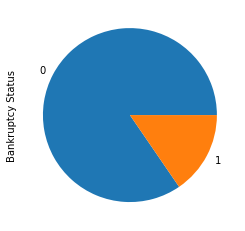

In [ ]:
df["Bankruptcy Status"].value_counts().plot(kind="pie")

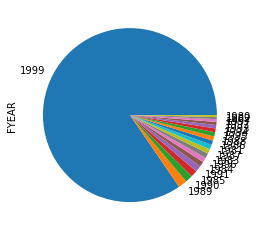

In [ ]:
df["FYEAR"].value_counts().plot(kind="pie")

In [ ]:
df['FYEAR'].value_counts()

1999    2262
1989      44
1990      37
1985      33
1991      31
1984      25
1996      24
1983      24
1987      23
1981      23
1986      22
1988      21
1995      21
1994      19
1993      17
1992      15
1997      14
1982      10
1980      10
Name: FYEAR, dtype: int64

In [ ]:
df = df.drop(['CUSTOMERID'], axis=1)

In [ ]:
df = df.drop(['FYEAR'], axis=1)

In [ ]:
df

,Bankruptcy Status,Ratio1,Ratio2,Ratio3,Ratio3.1,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9
0,0,0.307139,0.887006,1.647681,-0.199158,1.092964,-0.313289,-0.196793,1.206763,0.282471,0.158896
1,0,0.760736,0.592493,0.453003,-0.369890,0.186154,0.039619,0.327497,0.428418,1.106965,0.793443
2,0,-0.513596,0.337615,0.299015,-0.029080,-0.432605,0.829993,-0.707786,0.476153,2.179175,2.484584
3,1,-0.466129,0.370747,0.496067,-0.373429,-0.267424,0.977799,-0.610975,0.456810,0.151951,0.047789
4,0,2.023422,0.214876,0.182595,6.695360,-1.148338,-1.505889,2.876477,0.287375,-0.986442,0.791077
...,...,...,...,...,...,...,...,...,...,...,...
2670,0,0.191128,0.976163,0.608346,-0.278648,0.775383,-0.516430,-0.260754,0.713168,0.069354,-0.280715
2671,0,-0.580954,0.102915,-0.201120,-0.407839,-0.898906,0.675926,-0.354823,-0.191266,0.812556,0.689247
2672,1,0.235830,-0.859216,-2.064232,-0.254868,-1.132475,-0.949022,-0.003124,-2.208175,-1.659251,-1.410121
2673,0,0.916017,1.039148,0.527343,-0.238556,0.355071,-0.810784,0.306500,0.639685,0.031738,-0.259418


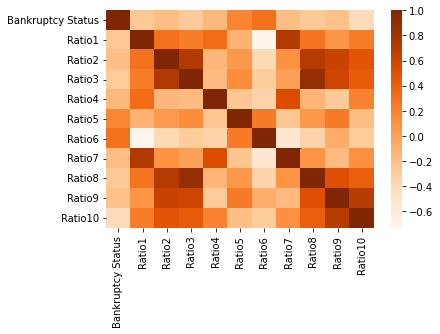

In [ ]:
sns.heatmap(df.corr(),cmap='Oranges')

In [ ]:
sc=MinMaxScaler()
df1=df
df=sc.fit_transform(df)

In [ ]:
df=pd.DataFrame(df,columns=df1.columns)

In [ ]:
df.columns
df.columns = ['Bankruptcy Status', 'Ratio1', 'Ratio2', 'Ratio3', 'Ratio4', 'Ratio5',
       'Ratio6', 'Ratio7', 'Ratio8', 'Ratio9', 'Ratio10']

In [ ]:
df

,Bankruptcy Status,Ratio1,Ratio2,Ratio3,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9,Ratio10
0,0.0,0.732090,0.839453,0.882382,0.032006,0.454959,0.180252,0.252224,0.811392,0.616264,0.505023
1,0.0,0.802896,0.760436,0.598388,0.008035,0.287034,0.233591,0.379792,0.626457,0.783073,0.640074
2,0.0,0.603974,0.692052,0.561782,0.055885,0.172452,0.353049,0.127891,0.637799,1.000000,1.000000
3,1.0,0.611383,0.700941,0.608625,0.007538,0.203040,0.375389,0.151447,0.633203,0.589858,0.481376
4,0.0,1.000000,0.659121,0.534107,1.000000,0.039911,0.000000,1.000000,0.592945,0.359541,0.639570
...,...,...,...,...,...,...,...,...,...,...,...
2670,0.0,0.713981,0.863374,0.635315,0.020845,0.396148,0.149548,0.236661,0.694113,0.573147,0.411460
2671,0.0,0.593459,0.629082,0.442892,0.002707,0.086101,0.329763,0.213773,0.479219,0.723509,0.617898
2672,1.0,0.720959,0.370942,0.000000,0.024184,0.042849,0.084166,0.299347,0.000000,0.223420,0.171089
2673,0.0,0.827135,0.880273,0.616059,0.026474,0.318314,0.105059,0.374683,0.676654,0.565536,0.415993


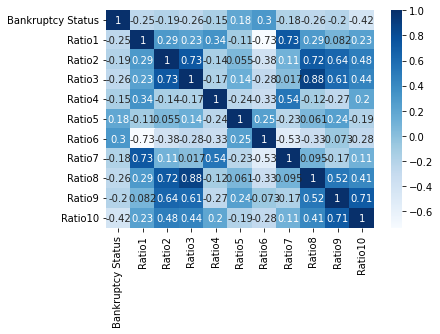

In [ ]:
sns.heatmap(df.corr(),cmap = 'Blues',annot =True)

In [ ]:
X=df.drop("Bankruptcy Status",axis=1)
Y=df["Bankruptcy Status"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix ,precision_score, recall_score

In [ ]:
print("Number transactions X_train dataset : ",X_train.shape)
print("Number transactions X_test dataset : ",X_test.shape)
print("Number transactions y_train dataset : ",Y_train.shape)
print("Number transactions y_test dataset : ",Y_test.shape)

Number transactions X_train dataset :  (2140, 10)
Number transactions X_test dataset :  (535, 10)
Number transactions y_train dataset :  (2140,)
Number transactions y_test dataset :  (535,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predictions=lr.predict(X_test)

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       460
         1.0       0.67      0.39      0.49        75

    accuracy                           0.89       535
   macro avg       0.79      0.68      0.71       535
weighted avg       0.87      0.89      0.87       535



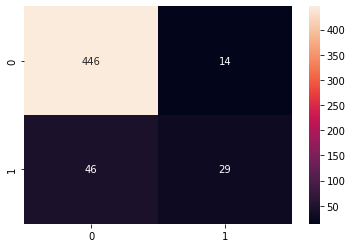

In [ ]:
y_pred = lr.predict(X_test)
y_test = pd.DataFrame(Y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
xgb1=xgb.XGBClassifier()
xgb1.fit(X_train,Y_train)
xgb1_yhat=xgb1.predict(X_test)
print(classification_report(Y_test,xgb1_yhat))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       460
         1.0       0.70      0.52      0.60        75

    accuracy                           0.90       535
   macro avg       0.81      0.74      0.77       535
weighted avg       0.89      0.90      0.89       535



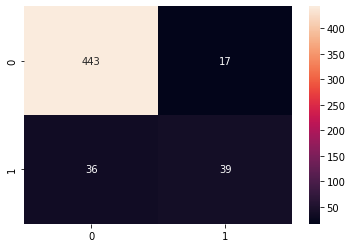

In [ ]:
y_pred = xgb1.predict(X_test)
y_test = pd.DataFrame(Y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

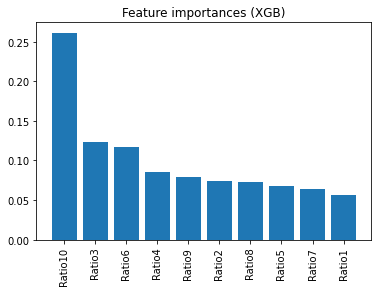

In [ ]:
#get feature importances from the model
from sklearn.ensemble import GradientBoostingClassifier
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb1.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()